In [6]:
%matplotlib inline

In [7]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
occ_df = pd.read_csv('testing/occ_stats_summary_log_unitocc_test_steadystate.csv')

In [3]:
bydt_df = pd.read_csv('testing/bydatetime_log_unitocc_test_steadystate.csv')

In [4]:
pp_occ = bydt_df[(bydt_df['category'] == 'PP')]['occupancy']

In [9]:
ldr_occ = bydt_df[(bydt_df['category'] == 'LDR')]['occupancy']

(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   3.,   5.,  12.,
         26.,  40.,  59.,  70.,  75.,  72.,  57.,  37.,  30.]),
 array([  2.77378472,   4.93509549,   7.09640625,   9.25771701,
         11.41902778,  13.58033854,  15.74164931,  17.90296007,
         20.06427083,  22.2255816 ,  24.38689236,  26.54820312,
         28.70951389,  30.87082465,  33.03213542,  35.19344618,
         37.35475694,  39.51606771,  41.67737847,  43.83868924,  46.        ]),
 <a list of 20 Patch objects>)

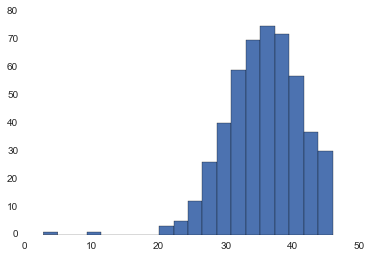

In [8]:
plt.hist(pp_occ.values,20)

(array([  1.,   0.,   0.,   1.,   2.,   6.,  12.,  13.,  30.,  53.,  47.,
         64.,  54.,  49.,  44.,  24.,  37.,  26.,  13.,  12.]),
 array([  0.  ,   0.65,   1.3 ,   1.95,   2.6 ,   3.25,   3.9 ,   4.55,
          5.2 ,   5.85,   6.5 ,   7.15,   7.8 ,   8.45,   9.1 ,   9.75,
         10.4 ,  11.05,  11.7 ,  12.35,  13.  ]),
 <a list of 20 Patch objects>)

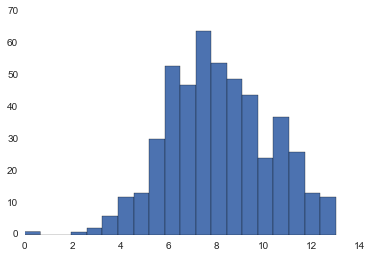

In [10]:
plt.hist(ldr_occ.values,20)

In [11]:
bydt_df.head()

,category,datetime,arrivals,departures,occupancy,day_of_week,bin_of_day,bin_of_week
0,LDR,2015-02-15 00:00:00,12,7,2.697824,6,0,6
1,LDR,2015-02-16 00:00:00,17,17,6.657824,0,0,0
2,LDR,2015-02-17 00:00:00,16,13,6.210556,1,0,1
3,LDR,2015-02-18 00:00:00,17,18,7.160961,2,0,2
4,LDR,2015-02-19 00:00:00,16,17,7.375949,3,0,3


In [12]:
bydt_df

,category,datetime,arrivals,departures,occupancy,day_of_week,bin_of_day,bin_of_week
0,LDR,2015-02-15 00:00:00,12,7,2.697824,6,0,6
1,LDR,2015-02-16 00:00:00,17,17,6.657824,0,0,0
2,LDR,2015-02-17 00:00:00,16,13,6.210556,1,0,1
3,LDR,2015-02-18 00:00:00,17,18,7.160961,2,0,2
4,LDR,2015-02-19 00:00:00,16,17,7.375949,3,0,3
5,LDR,2015-02-20 00:00:00,21,19,9.493576,4,0,4
6,LDR,2015-02-21 00:00:00,18,17,8.906806,5,0,5
7,LDR,2015-02-22 00:00:00,16,19,8.305035,6,0,6
8,LDR,2015-02-23 00:00:00,15,16,6.672234,0,0,0
9,LDR,2015-02-24 00:00:00,18,16,6.563194,1,0,1


In [13]:
pp_occ.describe()

count    488.000000
mean      35.670676
std        5.514466
min        2.773785
25%       32.275069
50%       35.801846
75%       39.551302
max       46.000000
Name: occupancy, dtype: float64

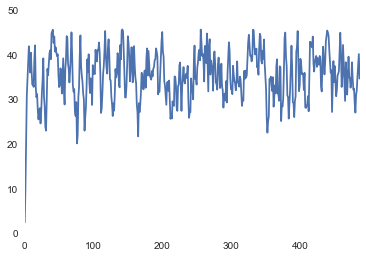

In [14]:
sns.tsplot(pp_occ);

In [15]:
pp_occ.head()

488     2.773785
489    10.258866
490    20.487118
491    31.099259
492    34.894653
Name: occupancy, dtype: float64